# Distinguishing Sentiments - Twitter

Observable Trends
1. The Sentiment Analysis of Media Tweets on July 15, 2018 scatter plot exhibits the compound sentiment of 100 tweets for NYTimes, BBC, CNN, FoxNews, and CBS for are widely dispersed within the Tweet Polarity between -1.0 and 1.0. It appears that the tweet overall sentiment for the news medias are more heavily scattered in the positive range. 
2. Despite the numerous positive and negative sentiments in tweets, there is also an overwhelming number of overall neutral sentiment tweets. It can be induced that the News Media tweets are not completely driven by emotions. 
3. The Overall Media Sentiment bar plot shows that BBC, CBS, Fox News on average had overall positive sentiments from July 15, 2018 to the past 100 tweets. It is possible that BBC, CBS, FoxNews have similar attitudes towards current events at the time of tweets.



In [24]:
#import modules used in analysis 
import tweepy 
import json 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime as datetime
import numpy as np
import seaborn as sns

#format seaborn plot
sns.set_style('whitegrid')

#import sentiment analysis 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#import keys and tokens
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [25]:
#tweepy API authentication 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#intiizalize Sentiment Analysis 
analyzer = SentimentIntensityAnalyzer()

In [26]:
#variable referencing target twitter user accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

In [27]:
#list to contain tweet sentiment analysis for each user
sentiment_results = {}

#dictionary of a collection of compound sentiment averages
compound_sentiment_average = {}

#loop through list of target user accounts
for user in target_user:
    
    public_tweets = api.user_timeline(user, count=100)
    
    #create list objects to hold collection of sentiment data 
    compound_list = []
    neutral_list = []
    positive_list = []
    negative_list = []
    
    #create list to hold tweet's time
    date_list = []
    
    #create list for tweet's relative upload time 
    tweets_ago = []
    
    #declare counter
    counter = 0
        
    #loop through each tweet for each user account
    for tweet in public_tweets:
        
        #variable referencing tweet text
        sample = tweet['text']
        
        #sentiment analysis of each tweet
        results = analyzer.polarity_scores(sample)
        
        #creating sentiment value objects for each tweet
        compound = results['compound']
        neutral = results['neu']
        positive = results['pos']
        negative = results['neg']
        
        #assign tweet created date to variable 
        date = tweet['created_at']
        
        #add sentiment data values to each corresponding sentiment list
        compound_list.append(compound)
        neutral_list.append(neutral)
        positive_list.append(positive)
        negative_list.append(negative)
        
        #format date from api call to datetime object
        date_object = datetime.strptime(date, "%a %b %d %H:%M:%S %z %Y")
        date_list.append(date_object)
        
        #keep track of when the tweet was tweeted relative to other tweets 
        tweets_ago.append(counter)
        
        #append dictionary with average compound sentiment for each targer user account
        compound_sentiment_average[user] = np.mean(compound_list)
        
        #counter to keep track of tweets 
        counter += 1
    
    sentiment_dictionary = {"Compound": compound_list, "Neutral": neutral_list, 
                           "Positive": positive_list, "Negative": negative_list, 
                           "Date": date_list, "Tweets Ago": tweets_ago}
    
    #collection of sentiment analysis for each tweet for each target user account
    sentiment_results[user] = sentiment_dictionary

    

In [28]:
#function to construct dataframe for each target user account 
def constructDF(user_account):
      
    df = pd.DataFrame(sentiment_results[user_account], 
                      columns=["Compound", "Positive", "Neutral", "Negative", "Date", "Tweets Ago"])
    
    return df

In [29]:
#construct and display bbc sentiments dataframe
bbc_df = constructDF("@BBC")
display(constructDF("@BBC").head())

,Compound,Positive,Neutral,Negative,Date,Tweets Ago
0,0.0000,0.000,1.000,0.000,2018-07-14 19:03:07+00:00,0
1,0.3818,0.157,0.843,0.000,2018-07-14 18:03:04+00:00,1
2,0.8271,0.391,0.609,0.000,2018-07-14 17:32:50+00:00,2
3,0.6688,0.176,0.824,0.000,2018-07-14 16:23:10+00:00,3
4,0.2714,0.232,0.621,0.147,2018-07-14 16:03:05+00:00,4


In [30]:
#construct and display cbs sentiments dataframe
cbs_df = constructDF("@CBS")
display(constructDF("@CBS").head())

,Compound,Positive,Neutral,Negative,Date,Tweets Ago
0,0.1139,0.078,0.922,0.000,2018-07-13 21:35:01+00:00,0
1,-0.4404,0.000,0.868,0.132,2018-07-13 21:15:41+00:00,1
2,0.0000,0.000,1.000,0.000,2018-07-13 17:49:38+00:00,2
3,0.6514,0.282,0.718,0.000,2018-07-12 01:01:24+00:00,3
4,0.5562,0.174,0.826,0.000,2018-07-11 21:44:45+00:00,4


In [31]:
#create and display cnn sentiments datafrmae
cnn_df = constructDF("@CNN")
display(constructDF("@CNN").head())

,Compound,Positive,Neutral,Negative,Date,Tweets Ago
0,-0.6705,0.000,0.732,0.268,2018-07-15 01:00:08+00:00,0
1,0.5574,0.217,0.783,0.000,2018-07-15 00:30:12+00:00,1
2,0.0772,0.091,0.909,0.000,2018-07-15 00:00:04+00:00,2
3,-0.0258,0.123,0.749,0.128,2018-07-14 23:30:08+00:00,3
4,0.0000,0.000,1.000,0.000,2018-07-14 23:00:05+00:00,4


In [32]:
#create and display foxnews sentiments dataframe
foxnews_df = constructDF("@FoxNews")

display(constructDF("@FoxNews").head())

,Compound,Positive,Neutral,Negative,Date,Tweets Ago
0,0.5423,0.226,0.774,0.000,2018-07-15 01:19:34+00:00,0
1,-0.4939,0.102,0.694,0.204,2018-07-15 01:16:04+00:00,1
2,-0.3867,0.067,0.790,0.143,2018-07-15 01:16:00+00:00,2
3,0.3612,0.172,0.828,0.000,2018-07-15 01:08:32+00:00,3
4,0.0000,0.000,1.000,0.000,2018-07-15 00:58:05+00:00,4


In [33]:
#create and display nytimes sentiments into dataframe
nytimes_df = constructDF("@nytimes")
display(constructDF("@nytimes").head())

,Compound,Positive,Neutral,Negative,Date,Tweets Ago
0,-0.8555,0.000,0.488,0.512,2018-07-15 01:07:13+00:00,0
1,0.5267,0.253,0.747,0.000,2018-07-15 01:00:02+00:00,1
2,0.0000,0.000,1.000,0.000,2018-07-15 00:31:01+00:00,2
3,-0.2263,0.000,0.826,0.174,2018-07-15 00:18:33+00:00,3
4,0.2960,0.099,0.901,0.000,2018-07-15 00:12:24+00:00,4


In [34]:
#construct scatter plot for news media 
def constructScatter(df, user):
    plt.scatter(df["Tweets Ago"], df["Compound"], s=100, label=user)
    plt.xlim([df["Tweets Ago"].max() + 5, df["Tweets Ago"].min() - 5])


#function to calculate compound weighted average to get overall sentiment
def overall_sent(df):
    totalCount = len(df['Compound'])
    weightedAverage = df["Compound"] * totalCount / totalCount
    overallSentiment = weightedAverage.mean()
    return overallSentiment

In [35]:
#format date into dateformat 
date_collected = datetime.strftime(nytimes_df['Date'][0], "%B %d, %Y")


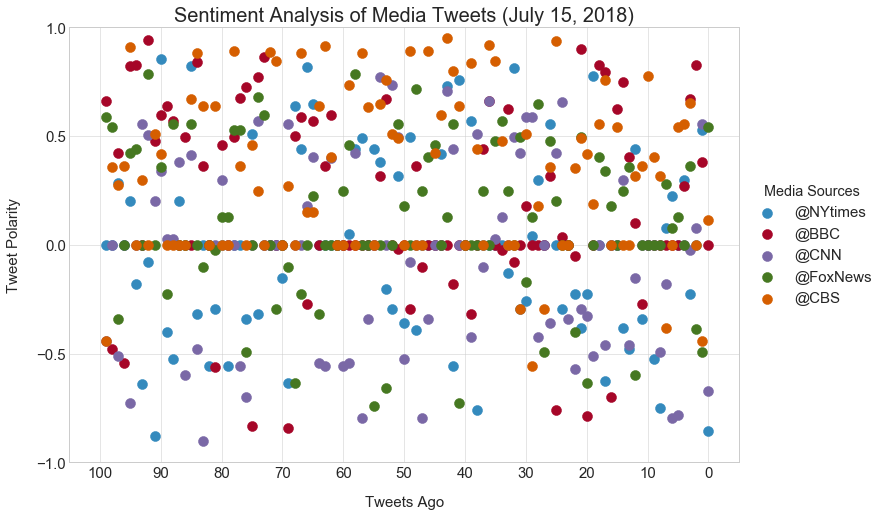

In [36]:
#create plot
plt.figure(figsize=(12,8))

#apply each scatterplot onto main plot
constructScatter(nytimes_df, "@NYtimes")
constructScatter(bbc_df, "@BBC")
constructScatter(cnn_df, "@CNN")
constructScatter(foxnews_df, "@FoxNews")
constructScatter(cbs_df, "@CBS")

#format scatterplot
plt.grid(True)
plt.style.use('bmh')
plt.title(f"Sentiment Analysis of Media Tweets ({date_collected})", fontsize='20')
plt.ylabel("Tweet Polarity", fontsize='15', labelpad=15)
plt.xlabel("Tweets Ago", fontsize='15', labelpad=15)
plt.xlim([105,-5])
plt.ylim([-1.0, 1.0])
plt.xticks(np.arange(100, -10, -10), fontsize=15)
plt.yticks(np.arange(-1.0, 1.5, 0.5), fontsize=15)

leg = plt.legend(title="Media Sources", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
leg.set_title("Media Sources", prop = {'size':'x-large'})

#save plot as image file
plt.savefig('tweetSentimentAnalysis.png', bbox_inches='tight')

#display Sentiment Analysis of Media Tweets plot
plt.show()

In [37]:
#overall sentiment value for each News Media
ny = float("{0:.2f}".format(overall_sent(nytimes_df)))
bbc = float("{0:.2f}".format(overall_sent(bbc_df)))
cnn = float("{0:.2f}".format(overall_sent(cnn_df)))
fox = float("{0:.2f}".format(overall_sent(foxnews_df)))
cbs = float("{0:.2f}".format(overall_sent(cbs_df)))

#print statements for overall sentiment value for News Media 
print(f'Overall Sentiment:')
print('-----------------------\n')
print(f'@NYTimes: {ny}\n')
print(f'@BBC: {bbc}\n')
print(f'@CNN: {cnn}\n')
print(f'@FoxNews: {fox}\n')
print(f'@CBS: {cbs}\n')

Overall Sentiment:
-----------------------

@NYTimes: 0.0

@BBC: 0.17

@CNN: -0.04

@FoxNews: 0.11

@CBS: 0.33



In [38]:
#calculate the average overall (compound) sentiment
overall_sent_list = [bbc, cbs, cnn, fox, ny]

#add average overall sentiment list to dataframe
overall = pd.DataFrame(overall_sent_list, index=target_user)
#rename columns to describe the column data values
overall = overall.reset_index().rename(columns={0:'Overall Sentiment', 'index':'Media Source'})

#display dataframe
overall

,Media Source,Overall Sentiment
0,@BBC,0.17
1,@CBS,0.33
2,@CNN,-0.04
3,@FoxNews,0.11
4,@nytimes,0.00


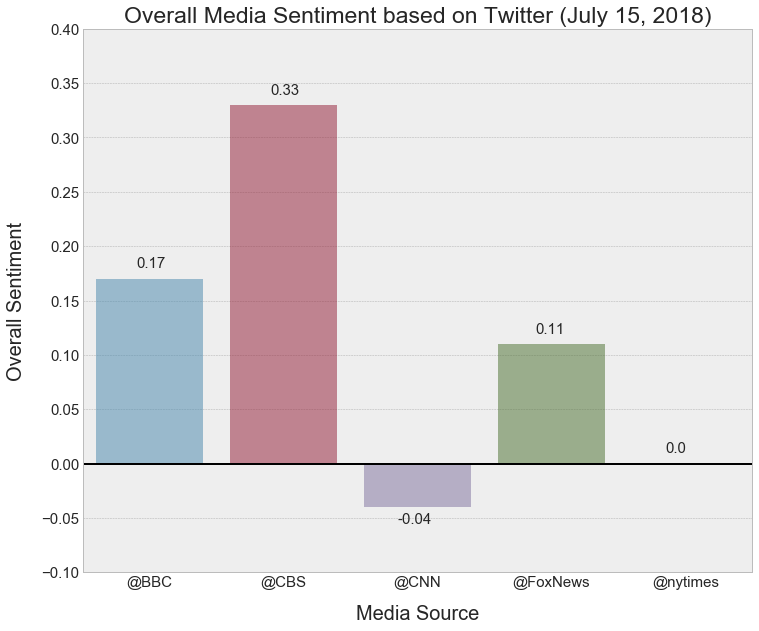

In [42]:
#create barplot for Overall Sentiment comparison for media sources
plt.figure(figsize=(12,10))

#add a horizontal line on y=0
plt.axhline(y=0, color='black', linestyle='-')

#plot barplot for overall sentiment for each news media
ax = sns.barplot(x='Media Source', y='Overall Sentiment', 
                 data=overall, alpha = 0.5)

#format the bar plot
plt.title(f"Overall Media Sentiment based on Twitter ({date_collected})", size=23)
plt.xticks(fontsize=15)
plt.yticks(np.arange(-0.1, 0.45, 0.05), fontsize=15)
ax.set_ylim(-0.1, 0.40)
ax.set_xlabel('Media Source', fontsize=20, labelpad=15)
ax.set_ylabel('Overall Sentiment', fontsize=20, labelpad=15)


#annotate barplot chart with overall sentiment values
ax.text(-0.10, 0.18, bbc, fontsize=15)
ax.text(0.9, 0.34, cbs, fontsize=15)
ax.text(1.85, -0.055, cnn, fontsize=15)
ax.text(2.88, 0.12, fox, fontsize=15)
ax.text(3.85, 0.01, ny, fontsize=15)

#save created plot 
plt.savefig('overallMediaSentiment.png')